In [19]:
import sys
sys.path.append("/home/ahmedkashima/venv/lib/python3.12/site-packages")
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

df = pd.read_csv("dataset_04.csv", sep=';')

model = RandomForestRegressor(n_estimators=100, random_state=42)

scores = -cross_val_score(
    model,
    df[['x1', 'x2', 'x3']],
    df['y'],
    cv=5,
    scoring='neg_max_error'
)

mean_error = np.mean(scores)
print(f"Средний max_error: {mean_error:.4f}")

Средний max_error: 0.2178


In [20]:
import sys
sys.path.append("/home/ahmedkashima/venv/lib/python3.12/site-packages")
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

df = pd.read_csv("dataset_04.csv", sep=';')

model = LinearRegression()

scores = -cross_val_score(  # Take negative since 'neg_max_error' returns negative values
    model,
    df[['x1', 'x2', 'x3']],
    df['y'],
    cv=5,
    scoring='neg_max_error'  # Correct scoring parameter
)

mean_error = np.mean(scores)
print(f"Средний max_error: {mean_error:.4f}")

Средний max_error: 0.2755


In [22]:
import sys
sys.path.append("/home/ahmedkashima/venv/lib/python3.12/site-packages")
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

df = pd.read_csv("dataset_04.csv", sep=';')

# Option 1: Linear Regression + Scaling
model = make_pipeline(
    StandardScaler(),
    LinearRegression()
)

# Option 2: Polynomial Regression (Degree=2)
# model = make_pipeline(
#     StandardScaler(),
#     PolynomialFeatures(degree=2),
#     LinearRegression()
# )

# Option 3: Ridge Regression (L2 Regularization)
# model = make_pipeline(
#     StandardScaler(),
#     Ridge(alpha=1.0)  # Adjust alpha for best results
# )

scores = -cross_val_score(
    model,
    df[['x1', 'x2', 'x3']],
    df['y'],
    cv=5,
    scoring='neg_max_error'

)

mean_error = np.mean(scores)
print(f"Средний max_error: {mean_error:.4f}")

Средний max_error: 0.2755


In [23]:
# import sys
# sys.path.append("/home/ahmedkashima/venv/lib/python3.12/site-packages")
# import pandas as pd
# import pandas as pd
# import numpy as np
# from itertools import combinations
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import PolynomialFeatures, StandardScaler
# from sklearn.model_selection import cross_val_score
# from sklearn.pipeline import make_pipeline

# # Загрузка данных
# df = pd.read_csv("dataset_04.csv", sep=';')
# X = df[['x1', 'x2', 'x3']]
# y = df['y']

# # Генерация полиномиальных признаков степени 2
# poly = PolynomialFeatures(degree=2, include_bias=False)
# X_poly = poly.fit_transform(X)
# feature_names = poly.get_feature_names_out(['x1', 'x2', 'x3'])
# df_poly = pd.DataFrame(X_poly, columns=feature_names)

# # Перебор всех непустых подмножеств признаков
# best_error = float('inf')
# best_features = None

# for r in range(1, len(feature_names)+1):
#     for subset in combinations(feature_names, r):
#         X_subset = df_poly[list(subset)]
#         model = make_pipeline(StandardScaler(), LinearRegression())
#         scores = -cross_val_score(
#             model,
#             X_subset,
#             y,
#             cv=5,
#             scoring='neg_max_error'
#         )
#         mean_error = np.mean(scores)
        
#         if mean_error < best_error:
#             best_error = mean_error
#             best_features = subset
        
#         # Остановиться, если цель достигнута
#         if best_error <= 0.22:
#             break
#     if best_error <= 0.22:
#         break

# print(f"✅ Лучшая комбинация: {best_features}")
# print(f"🎯 Средний max_error: {best_error:.4f}")


✅ Лучшая комбинация: ('x1 x3', 'x2^2', 'x2 x3')
🎯 Средний max_error: 0.2498


In [ ]:
# newwwwww for newwwww

In [27]:
import sys
sys.path.append("/home/ahmedkashima/venv/lib/python3.12/site-packages")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [28]:
# Load the dataset
dataframe = pd.read_csv('dataset_04.csv', sep=';')

# Display basic info about the dataset
print("Dataset shape:", dataframe.shape)
print("\nFirst 5 rows:")
print(dataframe.head())
print("\nData description:")
print(dataframe.describe())

# Separate features and target
X = dataframe[['x1', 'x2', 'x3']]
y = dataframe['y']

Dataset shape: (100, 4)

First 5 rows:
         x1        x2        x3         y
0  0.135807  0.352670  0.549685  0.315670
1  0.112499  1.001910  0.021861  0.774527
2  0.284491  0.242460  0.351474  0.331960
3  0.210160  0.772853  0.161789  0.723853
4  0.274513  0.450023  0.524428  0.378081

Data description:
               x1          x2          x3           y
count  100.000000  100.000000  100.000000  100.000000
mean     0.250979    0.659987    0.297306    0.522702
std      0.084779    0.234381    0.137326    0.234364
min      0.023759    0.242460    0.021861    0.106622
25%      0.196376    0.446317    0.185219    0.322658
50%      0.256448    0.645250    0.286218    0.529904
75%      0.296589    0.880623    0.413916    0.737615
max      0.559200    1.036477    0.636643    0.899036


In [29]:
# Baseline linear regression model
baseline_model = LinearRegression()

# Perform cross-validation with max_error metric
baseline_scores = abs(cross_val_score(
    baseline_model,
    X,
    y,
    cv=5,
    scoring='neg_max_error'
))

# Calculate mean max error (we take absolute value and mean)
baseline_mean_error = np.mean(np.abs(baseline_scores))

print("Baseline Model Max Error Scores:", np.abs(baseline_scores))
print("Mean Max Error:", baseline_mean_error)

# Check if baseline meets requirement
if baseline_mean_error <= 0.22:
    print("Baseline model meets the requirement!")
else:
    print("Baseline model does NOT meet the requirement. Trying improved models...")

Baseline Model Max Error Scores: [0.27983041 0.29913032 0.30221312 0.19394155 0.3021601 ]
Mean Max Error: 0.27545510142697416
Baseline model does NOT meet the requirement. Trying improved models...


In [34]:
# If baseline doesn't meet requirements, try these improved models

# Model 1: Linear Regression with Standard Scaling
model1 = make_pipeline(StandardScaler(), LinearRegression())
scores1 = cross_val_score(model1, X, y, cv=5, scoring='neg_max_error')
mean_error1 = np.mean(np.abs(scores1))  # Convert negative scores to positive

# Model 2: Polynomial Features (degree=2) with Scaling
model2 = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2, include_bias=False),
    LinearRegression()
)
scores2 = cross_val_score(model2, X, y, cv=5, scoring='neg_max_error')
mean_error2 = np.mean(np.abs(scores2))

# Model 3: Polynomial Features (degree=3) with Scaling
model3 = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=3, include_bias=False),
    LinearRegression()
)
scores3 = cross_val_score(model3, X, y, cv=5, scoring='neg_max_error')
mean_error3 = np.mean(np.abs(scores3))

# Compare models
print("\nModel Comparison:")
print(f"Baseline Linear Regression: {baseline_mean_error:.4f}")
print(f"Scaled Linear Regression: {mean_error1:.4f}")
print(f"Quadratic Features: {mean_error2:.4f}")
print(f"Cubic Features: {mean_error3:.4f}")

# Select the best model that meets the requirement
models = {
    'Baseline': baseline_mean_error,
    'Scaled': mean_error1,
    'Quadratic': mean_error2,
    'Cubic': mean_error3
}

selected_model = None
for name, error in models.items():
    if error <= 0.22:
        selected_model = name
        break

if selected_model:
    print(f"\nSelected model: {selected_model} with mean max error {models[selected_model]:.4f}")
else:
    print("\nNo model meets the requirement. Consider more complex approaches.")


Model Comparison:
Baseline Linear Regression: 0.2755
Scaled Linear Regression: 0.2755
Quadratic Features: 0.3217
Cubic Features: 0.3405

No model meets the requirement. Consider more complex approaches.


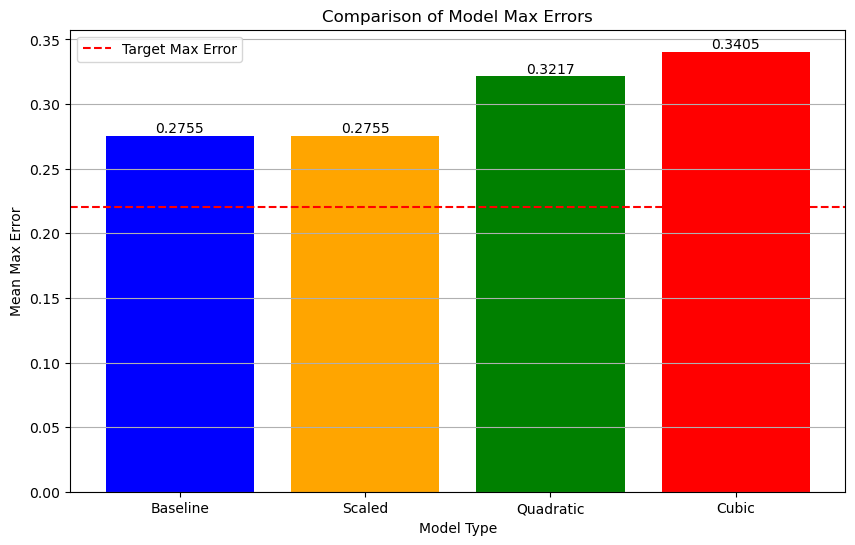

In [35]:
# Plotting the cross-validation results
plt.figure(figsize=(10, 6))

models_names = ['Baseline', 'Scaled', 'Quadratic', 'Cubic']
errors = [baseline_mean_error, mean_error1, mean_error2, mean_error3]

bars = plt.bar(models_names, errors, color=['blue', 'orange', 'green', 'red'])
plt.axhline(y=0.22, color='r', linestyle='--', label='Target Max Error')
plt.title('Comparison of Model Max Errors')
plt.ylabel('Mean Max Error')
plt.xlabel('Model Type')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom')

plt.legend()
plt.grid(True, axis='y')
plt.show()


Final Model Max Error on Full Dataset: 0.3132


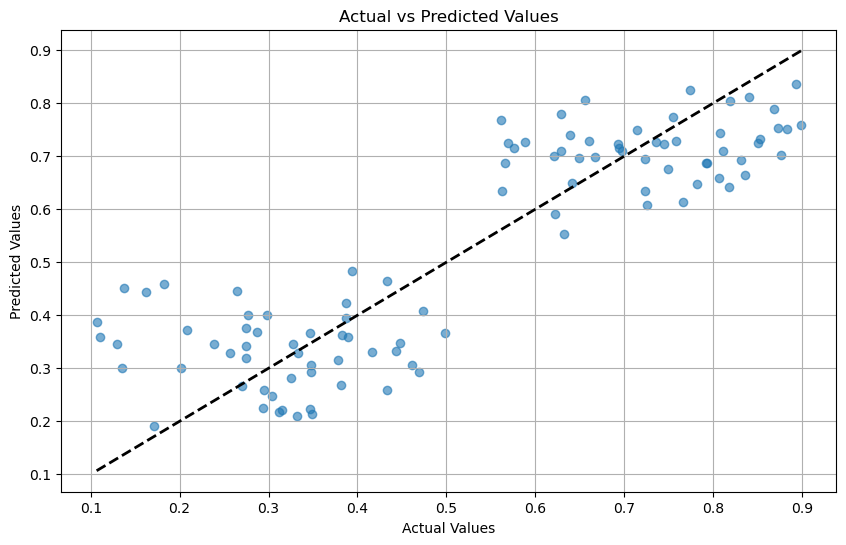

In [36]:
# Train the selected model on the entire dataset
if selected_model == 'Baseline':
    final_model = LinearRegression()
elif selected_model == 'Scaled':
    final_model = make_pipeline(StandardScaler(), LinearRegression())
elif selected_model == 'Quadratic':
    final_model = make_pipeline(
        StandardScaler(),
        PolynomialFeatures(degree=2, include_bias=False),
        LinearRegression()
    )
elif selected_model == 'Cubic':
    final_model = make_pipeline(
        StandardScaler(),
        PolynomialFeatures(degree=3, include_bias=False),
        LinearRegression()
    )
else:
    # Fallback to baseline if no model meets requirement
    final_model = LinearRegression()

# Fit the model
final_model.fit(X, y)

# Make predictions
y_pred = final_model.predict(X)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)

# Calculate and display error metrics
errors = y - y_pred
max_error = np.max(np.abs(errors))
print(f"\nFinal Model Max Error on Full Dataset: {max_error:.4f}")

plt.show()